In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../08-linear-regression-models/Advertising.csv')

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
X = df.drop('sales', axis=1)

In [6]:
y = df['sales']

In [7]:
from sklearn.preprocessing import PolynomialFeatures

In [8]:
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)

In [9]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [10]:
poly_features = polynomial_converter.transform(X)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
poly_features.shape

(200, 9)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
model = LinearRegression()

In [16]:
model.fit(X_train, y_train)

LinearRegression()

In [17]:
test_prediction = model.predict(X_test)

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [19]:
MAE = mean_absolute_error(y_test, test_prediction)

In [20]:
MSE = mean_squared_error(y_test, test_prediction)

In [21]:
RMSE = np.sqrt(MSE)

In [22]:
# create the difference order polynomial
# split polynomial feat into train/test
# fit on the training data
# store/save the rmse for both the train and test
# plot the results error vs polynomial order

In [23]:
train_rmse_errors = []
test_rmse_errors = []

In [26]:
for degree in range(1, 10):
    polynomial_converter = PolynomialFeatures(degree=degree, include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    model = LinearRegression()
    
    model.fit(X_train, y_train)
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
    
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)

In [27]:
train_rmse_errors

[1.734594124329376,
 0.5879574085292233,
 0.4339344356902067,
 0.35170836883993495,
 0.2509342951990972,
 0.1971254009841768,
 5.421422348088462,
 0.1426544837726474,
 0.16675345956185658]

In [28]:
test_rmse_errors

[1.5161519375993873,
 0.6646431757269196,
 0.5803286825231453,
 0.5077742623872589,
 2.5758247707699113,
 4.492670773896812,
 1381.404068580479,
 4449.568027403435,
 95893.02658330933]

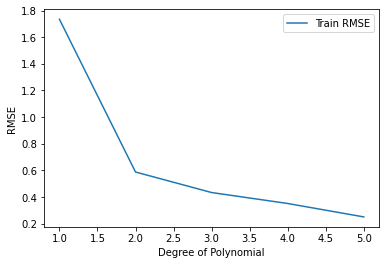

In [32]:
plt.plot(range(1, 6), train_rmse_errors[:5], label='Train RMSE')

plt.xlabel('Degree of Polynomial')
plt.ylabel('RMSE')

plt.legend()

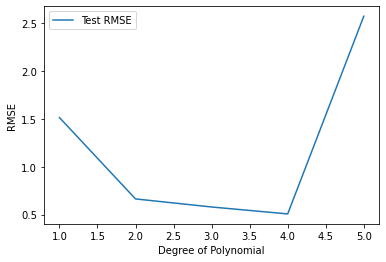

In [34]:
plt.plot(range(1, 6), test_rmse_errors[:5], label='Test RMSE')

plt.xlabel('Degree of Polynomial')
plt.ylabel('RMSE')

plt.legend()

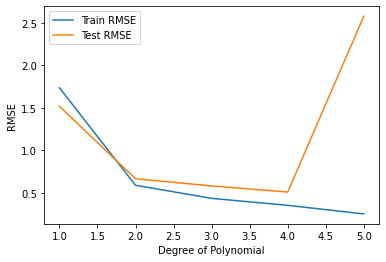

In [35]:
plt.plot(range(1, 6), train_rmse_errors[:5], label='Train RMSE')
plt.plot(range(1, 6), test_rmse_errors[:5], label='Test RMSE')

plt.xlabel('Degree of Polynomial')
plt.ylabel('RMSE')

plt.xlabel('Degree of Polynomial')
plt.ylabel('RMSE')

plt.legend()

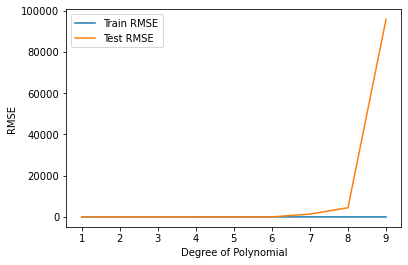

In [40]:
plt.plot(range(1, 10), train_rmse_errors, label='Train RMSE')
plt.plot(range(1, 10), test_rmse_errors, label='Test RMSE')

plt.xlabel('Degree of Polynomial')
plt.ylabel('RMSE')

plt.xlabel('Degree of Polynomial')
plt.ylabel('RMSE')

plt.legend()

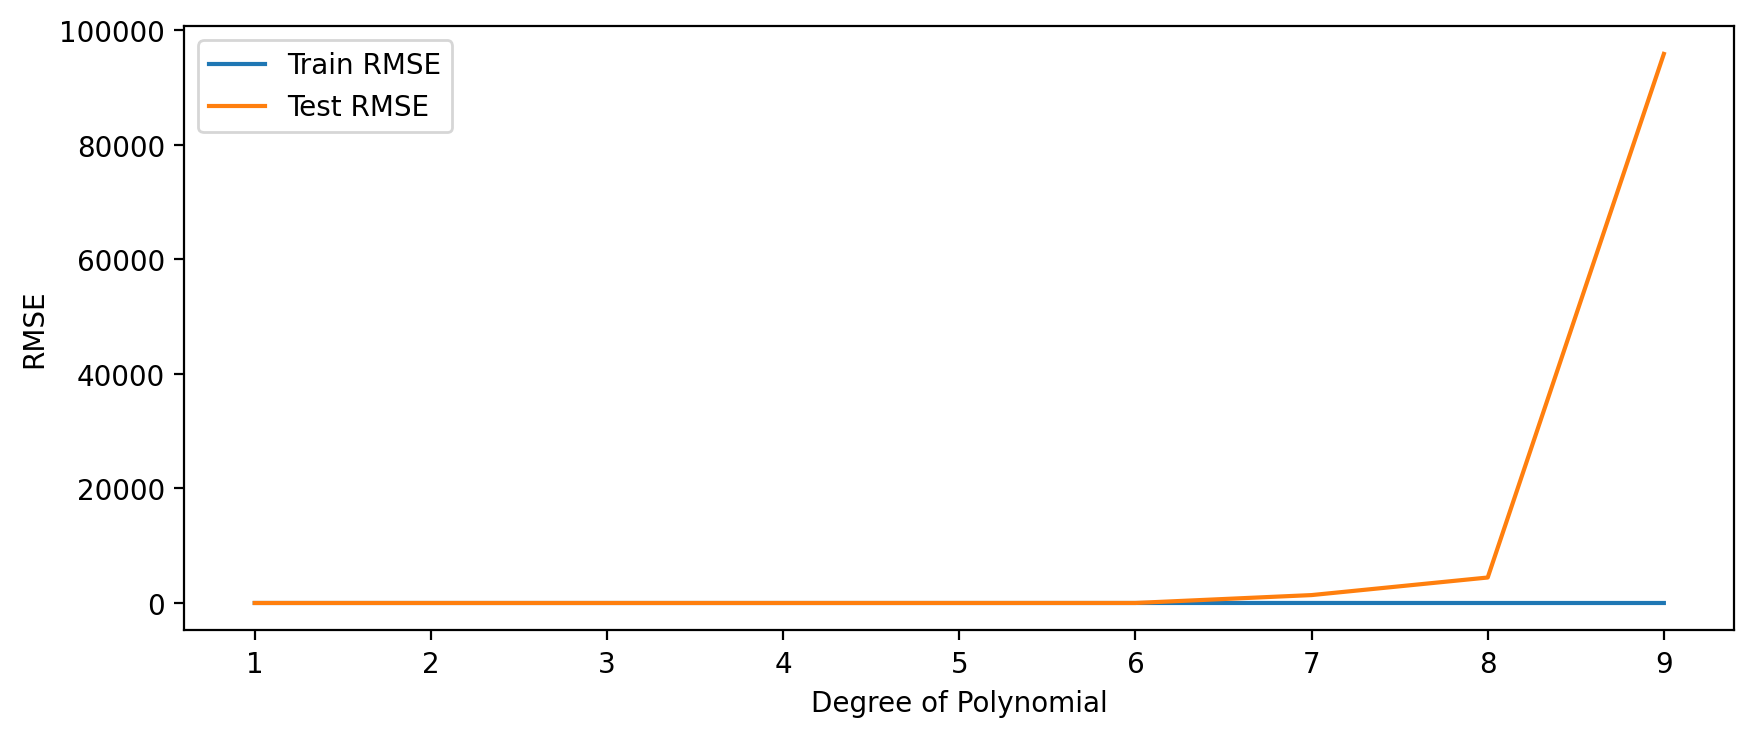

In [50]:
plt.figure(figsize=(10, 4), dpi=200)

plt.plot(range(1, 10), train_rmse_errors, label='Train RMSE')
plt.plot(range(1, 10), test_rmse_errors, label='Test RMSE')

plt.xlabel('Degree of Polynomial')
plt.ylabel('RMSE')

plt.xlabel('Degree of Polynomial')
plt.ylabel('RMSE')

plt.legend()